In [1]:
#Линейная регрессия
#Один признак
import UserAlgos as uAlg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
data_1 = pd.read_csv('Advertising.csv')

In [3]:
#Добавили новый столбец, который содержит суммарные затраты на рекламу
data_1['total_adv'] = data_1['TV'] + data_1['radio'] + data_1['newspaper']

<Axes: xlabel='total_adv', ylabel='sales'>

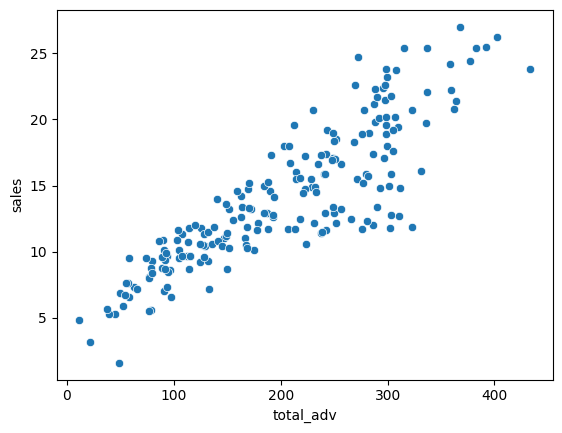

In [4]:
sns.scatterplot(data_1, x='total_adv', y='sales')

<Axes: xlabel='total_adv', ylabel='sales'>

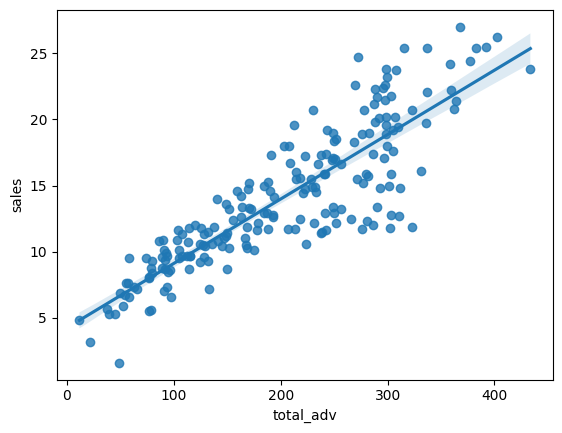

In [5]:
sns.regplot(data_1, x='total_adv', y='sales')

In [ ]:
#Простая линейная регрессия

In [6]:
X, y = data_1['total_adv'], data_1['sales']

In [7]:
#Вычислили коэффициенты простой линейной регрессии
B1, B0 = np.polyfit(X, y, deg=1)

In [8]:
potential_spend = np.linspace(0, 500, 100)
potential_sales = B1 * potential_spend + B0

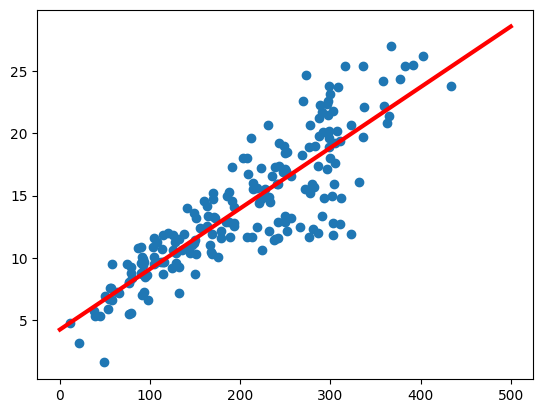

In [9]:
plt.plot(potential_spend, potential_sales, lw=3, color='Red')
plt.scatter(X, y)

In [ ]:
#Случай с несколькими признаками

In [17]:
X = data_1.drop('sales', axis=1)
y = data_1['sales']

In [4]:
#Создание тестовой и обучаюшей выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
#Создаем экземпляр модели
Lin_Model = LinearRegression()

In [6]:
#Обучаем модель на наборе данных для обучения
Lin_Model.fit(X_train, y_train)

LinearRegression()

In [7]:
#Используем модель на данных тестовой выборки
y_predict = Lin_Model.predict(X_test)

In [ ]:
#Вычисляем метрики и оцениваем работу модели

In [8]:
#Средняя абсолютная ошибка
mean_absolute_error(y_test, y_predict)

1.5116692224549086

In [9]:
#Среднеквадратическая ошибка
mean_squared_error(y_test, y_predict)

3.79679723671522

In [10]:
#Среднеквадратическое отклонение
np.sqrt(mean_squared_error(y_test, y_predict))

1.9485372043446387

In [ ]:
#Считаем и визулазируем остатки

In [11]:
remains = y_test - y_predict

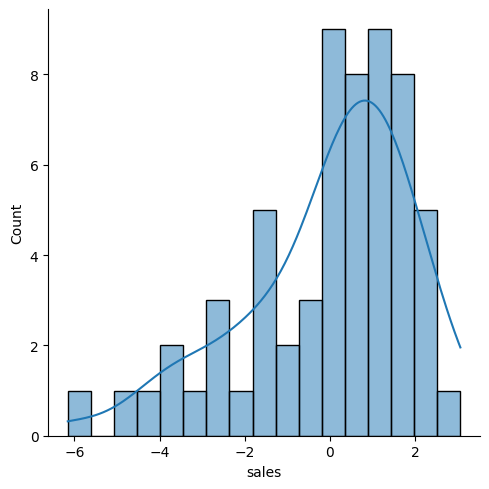

In [12]:
sns.displot(remains, bins=17, kde=True)

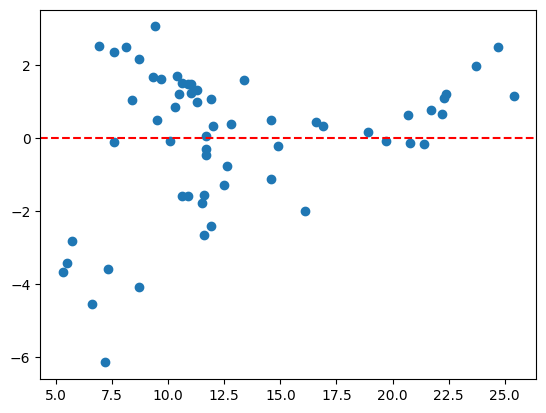

In [13]:
plt.scatter(y_test, remains)
plt.axhline(y=0, color='red', linestyle='--')

In [14]:
#Сохранение модели в файл

In [15]:
final_model = LinearRegression()

In [18]:
final_model.fit(X, y)

LinearRegression()

In [20]:
from joblib import dump, load

In [22]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [23]:
loaded_model = load('final_sales_model.joblib')